# Self organizing (Kohonen) maps

**Loading the datasets**

In [1]:
import pandas as pd
import numpy as np

In [2]:
gauss_2d_separated = pd.read_csv('data/gauss-2d-separated.txt', sep='\s+', header=None).to_numpy()
gauss_2d_mixed = pd.read_csv('data/gauss-2d-mixed.txt', sep='\s+', header=None).to_numpy()
gauss_64d = pd.read_csv('data/gauss-64d.txt', sep='\s+', header=None).to_numpy()

**The formulas for Kohonen networks**

For each training example, first its euclidian distance is calculated to each of the output nodes' weight vector:
$$ d_i(x) = \sum_{j=1}^{n} (x_j - w_{ij})^2 $$
Then, the closes output node is chosen, and the weights are updated so that the current example has most impact on the winner nodes neighbourhood. If best matching node is called u, then weight vectors of all the nodes v at time step t are updated according to this formula: 

$$ W_v(t)+=\eta(t, v, u) * \alpha(t) * (Inp(t) - W_v(t)) $$

Where
* &eta; is a neighbourhood function, typically gaussian or linear activation, with size of the neighbourhood decreasing over time
* &alpha; is the learning rate, also decreasing over time to anneal the learning process
* Inp(t) is the input vector at iteration t
* v is the currently updated output node
* u is the best matching node, most similar to the input
* W(t) is the weight vector connecting currently updated node to the input nodes
* t is the current iteration in the epoch

**Plot the 2d datasets**

In [3]:
from matplotlib import pyplot as plt

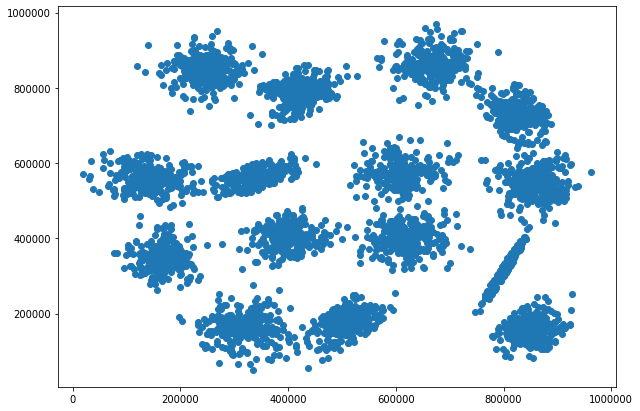

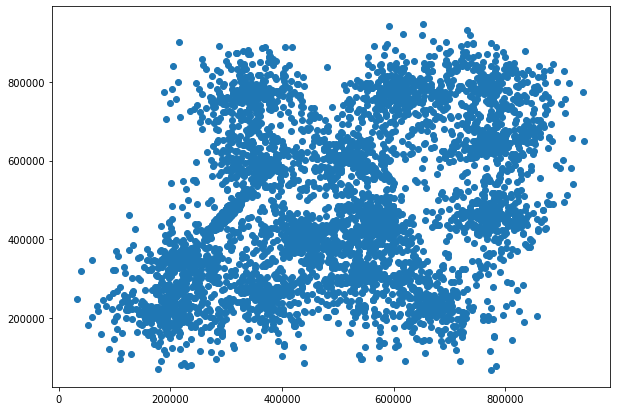

In [4]:
plt.figure(figsize=(10,7))
gauss_2d_sep_list = list(zip(*gauss_2d_separated))
gauss_2d_mixed_list = list(zip(*gauss_2d_mixed))
plt.plot(list(gauss_2d_sep_list[0]), list(gauss_2d_sep_list[1]), 'o')
plt.show()
plt.figure(figsize=(10,7))
plt.plot(list(gauss_2d_mixed_list[0]), list(gauss_2d_mixed_list[1]), 'o')
plt.show()

**Training SOMs on the datasets**

With random weight initialization and gaussian neighbourhood function

In [5]:
from minisom import MiniSom

In [6]:
from math import sqrt

In [7]:
dim_2d = round(sqrt(5 * sqrt(len(gauss_2d_separated))))
dim_64d = round(sqrt(5 * sqrt(len(gauss_64d))))

In [116]:
gauss_2d_sep_som = MiniSom(x=dim_2d + 2, y=dim_2d + 2, input_len=2, sigma=2.6, learning_rate=1.2)
gauss_2d_mix_som = MiniSom(dim_2d + 4, dim_2d + 4, 2, sigma=3.9, learning_rate=2.7)
gauss_64d_som = MiniSom(dim_64d, dim_64d, 64, sigma=1.5, learning_rate=1.0)

In [117]:
gauss_2d_sep_som.train_random(gauss_2d_separated, 300)
gauss_2d_mix_som.train_random(gauss_2d_mixed, 300)
gauss_64d_som.train_random(gauss_64d, 300)

**Plot the training results as a node weight distance map, with number of hits for each output node**

In [16]:
from pylab import pcolor, colorbar, plot, figure, text

Gaussian 2d, fairly separated into 15 clusters

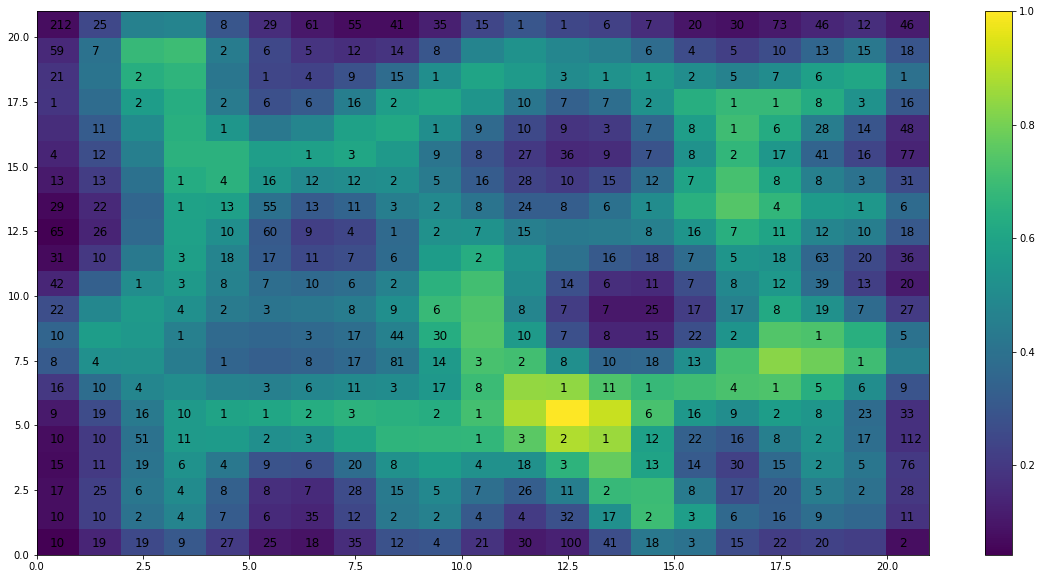

In [63]:
figure(figsize=(20, 10))
pcolor(gauss_2d_sep_som.distance_map().T)
for (x,y), v in gauss_2d_sep_som.win_map(gauss_2d_separated).items():
    text(x + .3, y + .3, str(len(v)), fontsize=12)
colorbar()

Gaussian 2d, 15 mixed clusters

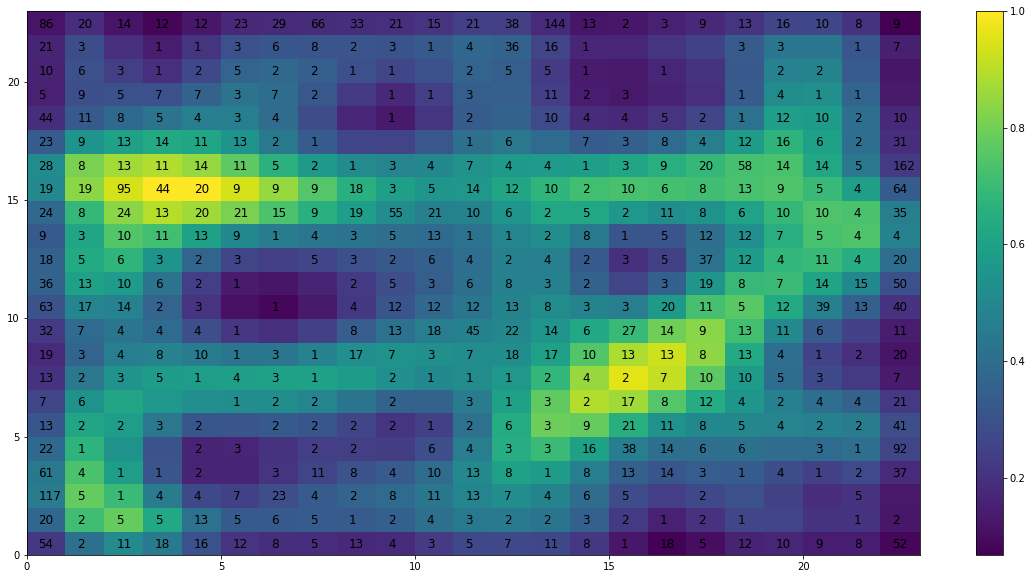

In [118]:
figure(figsize=(20, 10))
pcolor(gauss_2d_mix_som.distance_map().T)
for (x,y), v in gauss_2d_mix_som.win_map(gauss_2d_mixed).items():
    text(x + .3, y + .3, str(len(v)), fontsize=12)
colorbar()

Gaussian 64d, well separated into 16 clusters

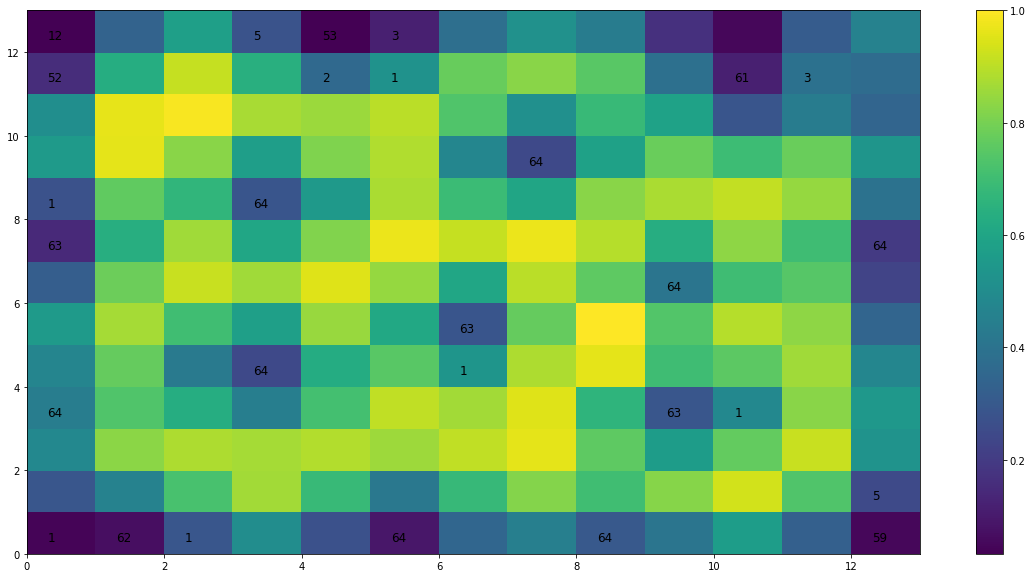

In [19]:
figure(figsize=(20, 10))
pcolor(gauss_64d_som.distance_map().T)
for (x,y), v in gauss_64d_som.win_map(gauss_64d).items():
    text(x + .3, y + .3, str(len(v)), fontsize=12)
colorbar()

We can clearly see the 16 clusters of the 64 dimensional dataset. 

The 2-dimensional datasets are more tricky and required a lot of hyperparameter tuning. In the end, 15 clusters in the separated dataset are roughly visible. The overlapping-cluster dataset is, as expected, the hardest, though some clusters could be recognized analyzing it's weight's color map and number of hits
